## Importación de datos

In [1]:
import json
USER_DIR = 'C:/Users/abram/Documents/MATI/TrabajoDeCurso/Spotify/api'

In [2]:
jArt1 = os.path.join(USER_DIR,'50cent-dataArtists1.json')
jArt2 = os.path.join(USER_DIR,'50cent-dataArtists2.json')
jArt3 = os.path.join(USER_DIR,'50cent-dataArtists3.json')
jArt4 = os.path.join(USER_DIR,'50cent-dataArtists4.json')
dataArt1 = json.loads(open(jArt1).read())
dataArt2 = json.loads(open(jArt2).read())
dataArt3 = json.loads(open(jArt3).read())
dataArt4 = json.loads(open(jArt4).read())
dataArtists = [dataArt1, dataArt2, dataArt3, dataArt4]

In [3]:
jPlay1 = os.path.join(USER_DIR,'50cent-dataPlaylist1.json')
jPlay2 = os.path.join(USER_DIR,'50cent-dataPlaylist2.json')
jPlay3 = os.path.join(USER_DIR,'50cent-dataPlaylist3.json')
jPlay4 = os.path.join(USER_DIR,'50cent-dataPlaylist4.json')
dataPlay1 = json.loads(open(jPlay1).read())
dataPlay2 = json.loads(open(jPlay2).read())
dataPlay3 = json.loads(open(jPlay3).read())
dataPlay4 = json.loads(open(jPlay4).read())
dataPlayLists = [dataPlay1, dataPlay2, dataPlay3, dataPlay4]

## Creación del grafo

Método auxiliar para la creación del grafo:

In [4]:
def anadeVertices(G, a): #añade vertices al grafo en funcion de la lista de reproduccion
    G.add_vertices(a)
    return G
def anadeArista(G, a, z): #añade aristas al grafo en funcion de los artistas
    for i in range(0,len(a)):
        if(i==len(a)-1):
            G.add_edge(a[-1],a[0],z)
        else:
            G.add_edge(a[i], a[i+1], z)
    return G

Obtenemos el grafo:

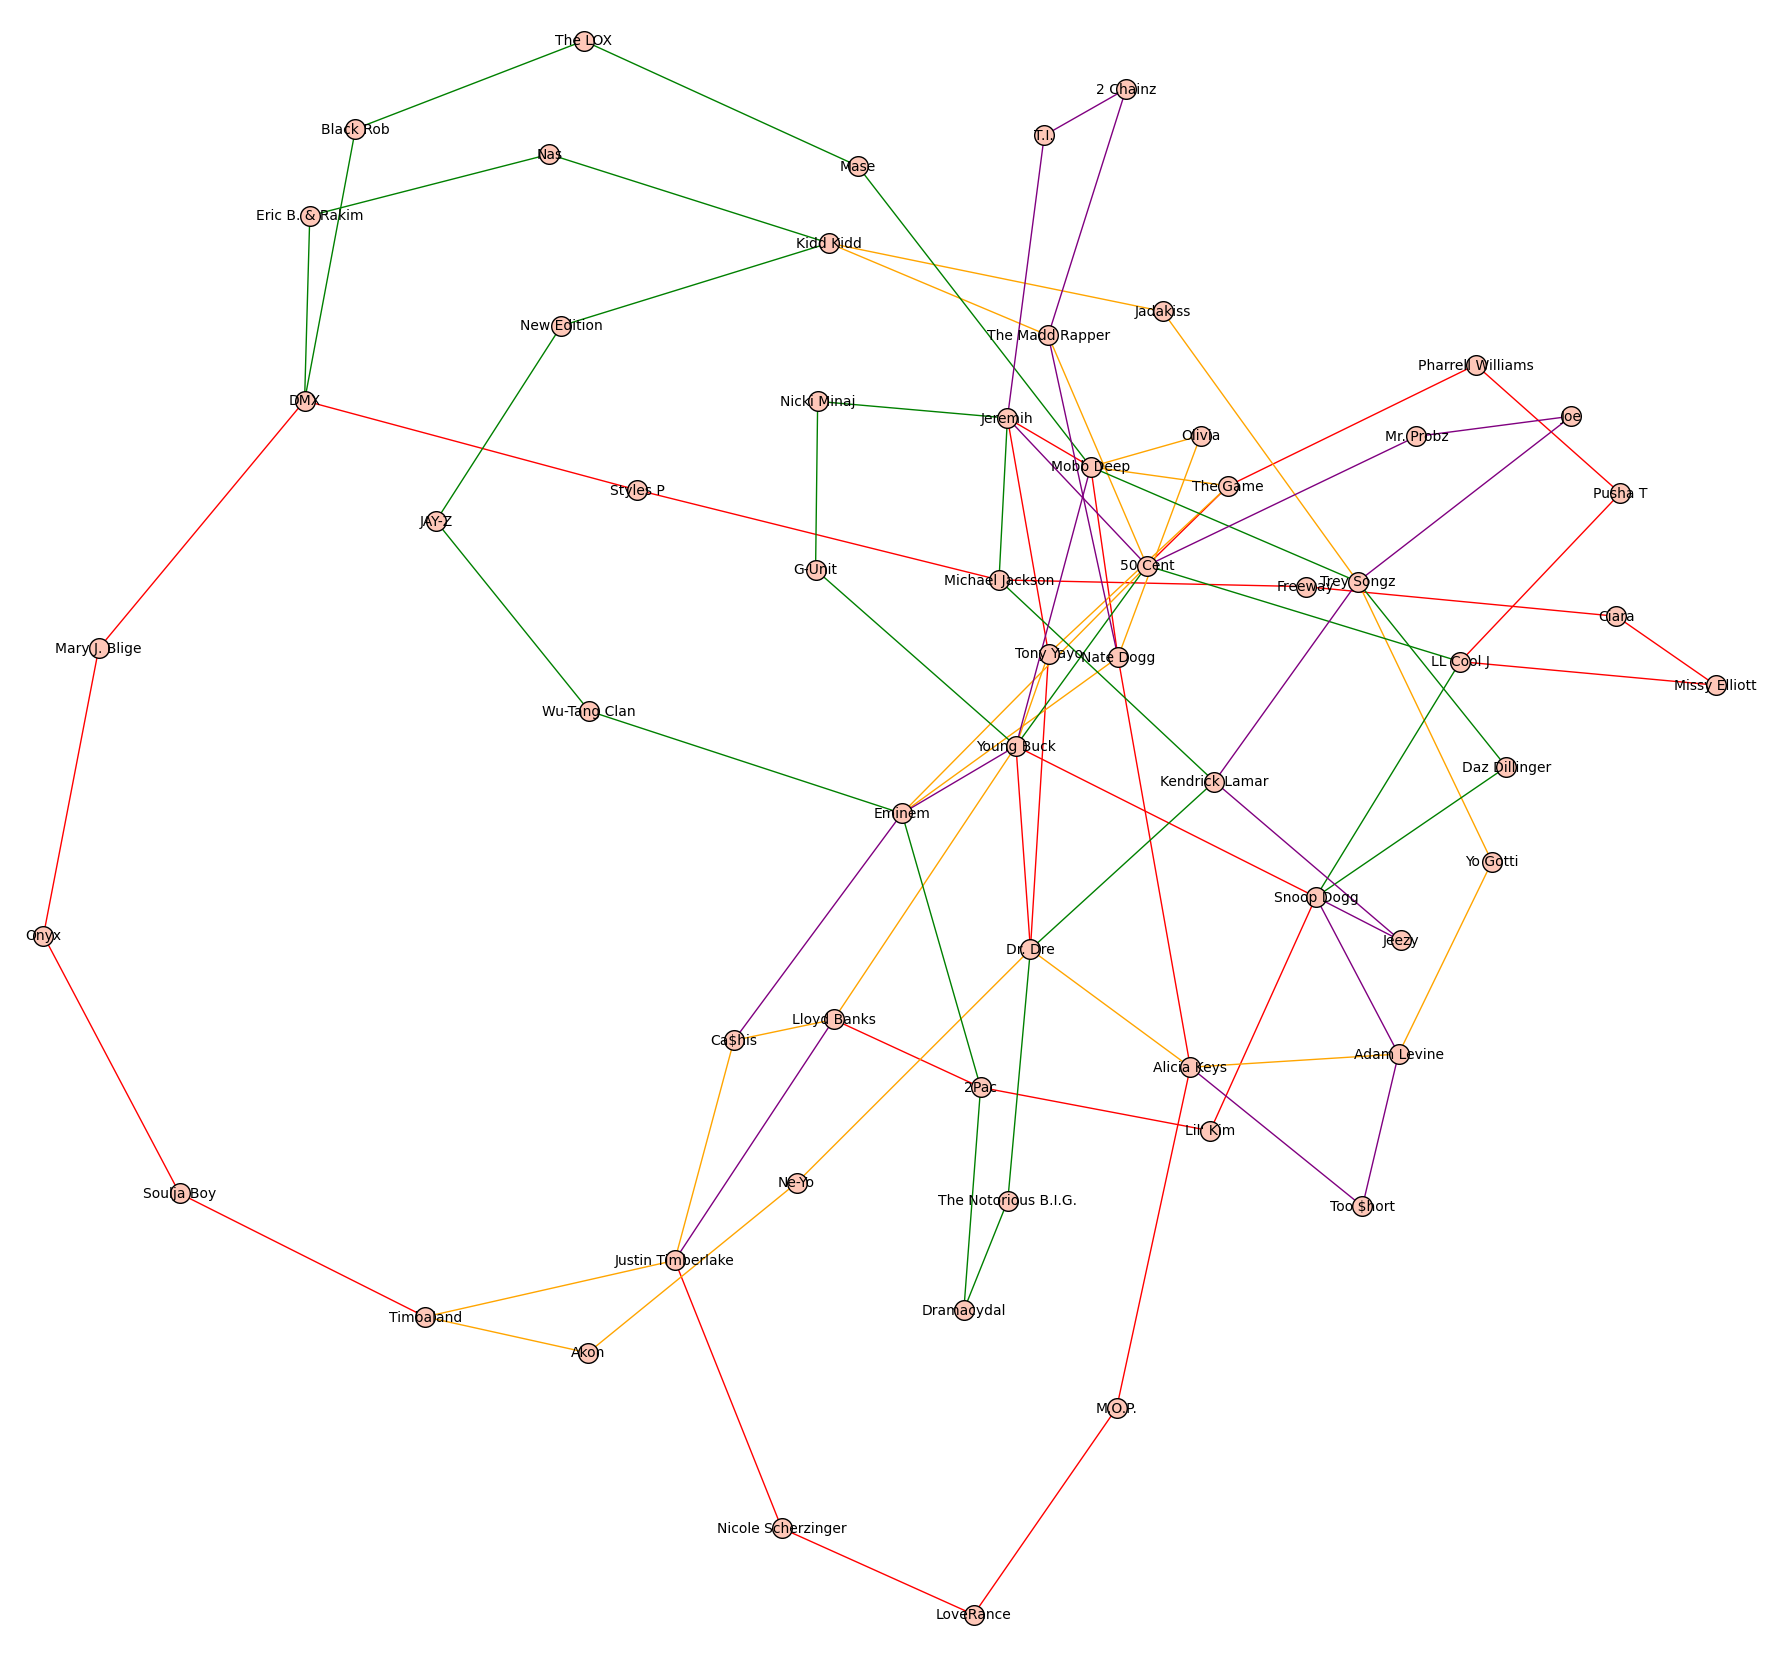

In [5]:
G=Graph()
b = len(dataPlayLists)
for i in range(0,b):
    artistas = [] # todos los artistas de todas las listas
    a = dataPlayLists[i]
    z = len(a)
    for j in range(0, z):
        c = a[j]
        artistas.append(c['2'])
        
    l = [val for sublist in artistas for val in sublist] #añade los artistas
    
    l = list(dict.fromkeys(l))
    G=anadeVertices(G,l)
    G=anadeArista(G,l,i)
      
        
d={0: "red", 1: "purple", 2:'orange', 3:'green'}

G.plot(edge_colors=G._color_by_label(d), edge_style='solid').show(figsize=25 ,fontsize=20)    #artistas que aparecen en una playlist    

## Popularidad de los artistas por playlist:

In [9]:
for i in range(0,len(dataArtists)):
    
    a = dataArtists[i]
    popular=dict()
    popularidadTotal=list()
    for j in range(0,len(dataArtists[i])):
        c=a[j]
        popular.update({c['0']:c['2']})
        
    
    p={k: v for k, v in sorted(popular.items(), key=lambda item: item[1])} #sort dict
    
    print(p,"\n")#Popularidades de esta playliyst
    
    for key, value in p.items():
        s=key+":"+str(value)
        popularidadTotal.append(s)
    
    print('Los mas populares son:')
    print(popularidadTotal[20:len(popularidadTotal)])
    print('-----------')

#De los artistas que participan en las playlists se han obtenido 
#los mas populares por cada playlists, del mas popular se puede ver que Eminen es el ganador

{'LoveRance': 41, 'Tony Yayo': 52, 'Freeway': 52, 'Ca$his': 54, 'Onyx': 55, 'M.O.P.': 57, 'Young Buck': 63, 'Nicole Scherzinger': 63, 'Lloyd Banks': 64, 'Styles P': 64, 'LL Cool J': 65, "Lil' Kim": 68, 'Mobb Deep': 69, 'Soulja Boy': 69, 'DMX': 72, 'Pusha T': 72, 'Ciara': 73, 'Mary J. Blige': 74, 'Missy Elliott': 74, 'The Game': 75, 'Nate Dogg': 78, 'Timbaland': 78, 'Dr. Dre': 80, 'Jeremih': 80, 'Pharrell Williams': 80, '2Pac': 81, 'Alicia Keys': 82, 'Justin Timberlake': 82, '50 Cent': 84, 'Michael Jackson': 84, 'Snoop Dogg': 85, 'Eminem': 94} 

Los mas populares son:
['Nate Dogg:78', 'Timbaland:78', 'Dr. Dre:80', 'Jeremih:80', 'Pharrell Williams:80', '2Pac:81', 'Alicia Keys:82', 'Justin Timberlake:82', '50 Cent:84', 'Michael Jackson:84', 'Snoop Dogg:85', 'Eminem:94']
-----------
{'Joe': 31, 'The Madd Rapper': 32, 'Ca$his': 54, 'Young Buck': 63, 'Lloyd Banks': 64, 'Olivia': 65, 'Too $hort': 67, 'Mr. Probz': 68, 'Mobb Deep': 69, 'Adam Levine': 73, 'Jeezy': 75, 'Trey Songz': 77, 'T.I.': 7

## Generos mas populares por cada artista y playlist:

In [7]:
for i in range(0,len(dataArtists)):
    generos=[]
    a = dataArtists[i]
    genres=dict()
    for j in range(0,len(dataArtists[i])):
        c=a[j]
        generos.append(c['1'])
    
    g = [val for sublist in generos for val in sublist] #añade los generos de esta playlist
        
    #cuenta generos que aparecen
    for v in range(0,len(g)):
        if g[v] in genres:
            genres[g[v]]=genres[g[v]]+1
        else:
            genres[g[v]]=1
    
    genres={k: v for k, v in sorted(genres.items(), key=lambda item: item[1])} #sort dict
    print(genres,"\n")#generos por playlist
    print("El genero mas popular es",list(genres)[-1])
    print('-------------------------------')

{'trap queen': 1, 'chicago rap': 1, 'electropop': 1, 'europop': 1, 'atl hip hop': 1, 'soul': 1, 'alternative hip hop': 1, 'philly rap': 1, 'new jack swing': 1, 'old school hip hop': 1, 'underground hip hop': 1, 'crunk': 2, 'nashville hip hop': 2, 'neo soul': 2, 'pop dance': 2, 'post-teen pop': 2, 'battle rap': 2, 'virginia hip hop': 2, 'dirty south rap': 3, 'detroit hip hop': 6, 'g funk': 6, 'west coast rap': 6, 'hip pop': 6, 'r&b': 7, 'urban contemporary': 8, 'pop': 8, 'dance pop': 9, 'hardcore hip hop': 10, 'trap': 12, 'southern hip hop': 13, 'east coast hip hop': 40, 'queens hip hop': 41, 'pop rap': 54, 'gangster rap': 55, 'rap': 64, 'hip hop': 67} 

El genero mas popular es hip hop
-------------------------------
{'nashville hip hop': 1, 'hip pop': 1, 'neo soul': 1, 'cali rap': 1, 'hyphy': 1, 'oakland hip hop': 1, 'pop rock': 1, 'conscious hip hop': 1, 'edm': 1, 'tropical house': 1, 'chicago rap': 2, 'crunk': 2, 'pop dance': 2, 'atl hip hop': 3, 'dirty south rap': 3, 'hardcore hip 

Se pueden observar las comunidades segun los generos por artista, 
de las playlist anteriores podemos encontrar que los generos raiz son el hiphop y el rap
y podemos encontrar generos derivados como el nashville hip hop o el electropop.

## Centralidad

La centralidad de intermediacion nos permite detectar aquellos nodos que hacen de puente para otros nodos de tal forma que el camino se hace mas corto.
En este grafo tras aplicar la centralidad de intermediacion y coger los valores mas altos podemos observar que los mas importantes son Young Buck y 50 cent, curioso ya que 50 cent esta en todas las playlists.

In [10]:
x=G.centrality_betweenness()
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
print(list(sorted_x)[55:-1])

[('Michael Jackson', 0.12827145547484528), ('Eminem', 0.13137386781454577), ('Dr. Dre', 0.1445827728454847), ('Mobb Deep', 0.14911689534570888), ('50 Cent', 0.17672450901264455)]


In [38]:
#Practicamente coincide con el centro del grafo
x=G.centrality_closeness()
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
print(list(sorted_x)[55:-1])

[('Jeremih', 0.3409090909090909), ('Dr. Dre', 0.3468208092485549), ('Eminem', 0.3488372093023256), ('50 Cent', 0.3592814371257485), ('Mobb Deep', 0.3592814371257485)]


In [39]:
x=G.centrality_degree()
#print(x)
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
print(list(sorted_x)[50:-1])

[('Kidd Kidd', 1/15), ('Nate Dogg', 1/12), ('Alicia Keys', 1/12), ('Eminem', 1/10), ('Snoop Dogg', 1/10), ('Dr. Dre', 1/10), ('Jeremih', 1/10), ('Trey Songz', 1/10), ('50 Cent', 7/60), ('Mobb Deep', 7/60)]


Lo sorpredente de esta centralidad de grado es que a pesar de que 50cent es nuestro autor de estudio Mobb Deep tiene la misma centralidad de grado.